 ## PRJ_001 Predict Diabetes v1.0 Baseline

### 1.0 Define Problem 
#### Data Overview & Problem Statement  

##### Dataset : medical records of patients assessed for diabetes
    - Called Pima Indians Dataset by UCI ML Repository. 
    - Pima Indians : Native Americans from Arizona USA. 
    - prone to obesity and diabetes. 
    - The last col ‘class’ is the diagnosis : has diabetes (1) or not (0)
    
##### Input Features 
    - preg = Number of times pregnant
    - plas = Blood Glucose : 2-hr-val 140 - 200  prone ; > 200 : diabetic
    - pres = diastolic BP up till 60 yrs then down, 
    - skin = Triceps skin fold thickness (mm) : 2-Hour serum insulin (mu U/ml)
    - mass = BMI (wt. kg/ht m^2); BMI above normal : risk of diabetes
    - pedi = Diabetes pedigree function
    - age =  Patient’s Age (years)

##### Target variable
    - class = Class variable (1: +ve, 0: -ve for diabetes) : binary (0/1)

##### Objective: To predict whether a given new patient is likely to get diabetes in the next 5 years based on the measurements

#### 1.1 Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### 1.2 Read input data

In [2]:
data0=pd.read_csv('D:/ARVEE/DSc_Course/pima-indians-diabetes.data.csv',header=None)
data0.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

###  2.0 Summarize Data 

#### 2.1 High level view of data

In [3]:
# Number of rows and columns
print(data0.shape)

(768, 9)


In [4]:
#Observe a few rows
print(data0.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

#### 2.2 Descriptive statistics 

In [5]:
from pandas import set_option
set_option('display.width', 100) 
set_option('precision', 2)
#Statistical summary
print(data0.describe())

         preg    plas    pres    skin    test    mass    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   79.80   31.99    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95  115.24    7.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00    0.00    0.00    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00    0.00   27.30    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   30.50   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00  127.25   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00  846.00   67.10    2.42   81.00    1.00


In [6]:
#Class distribution
print(data0.groupby('class').size())

class
0    500
1    268
dtype: int64


In [7]:
# Pairwise Pearson correlations
from pandas import set_option
set_option('display.width', 100) 
set_option('precision', 3)
data0.corr(method='pearson') 

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


#### 2.2 Data visualizations

In [8]:
data0['mass'].hist()

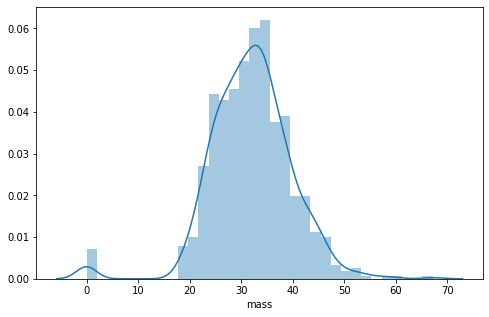

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(data0['mass'])

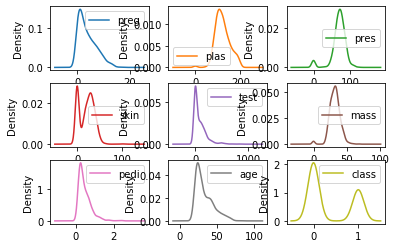

In [10]:
# Univariate Density Plots 
data0.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
plt.show()

###  3.0 Prepare Data 


#### 3.1 Data Cleaning 
- None applicable for this dataset

#### 3.2 Feature Selection 


##### Separate features and label

In [11]:
array = data0.values 
X = array[:,0:8] 
Y = array[:,8]

##### Split data into train & test

In [38]:
test_size=0.20       #80/20 breakup
seed=131             #seed 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

#### 3.3 Data Transforms


In [39]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(X_train) 
std_trnX = scaler.transform(X_train)
scaler1 = StandardScaler().fit(X_test) 
std_tstX = scaler1.transform(X_test)
# summarize transformed data
set_printoptions(precision=3) 
print('\n standardized input: \n %s' % std_trnX[0:5,:])
print(std_trnX.shape)


 standardized input: 
 [[ 0.058 -0.68   0.358 -0.332 -0.244 -1.091 -0.726 -1.046]
 [-0.841 -0.895 -0.357  0.305 -0.332 -1.554  0.044 -0.709]
 [ 2.754  0.242 -3.525  0.624 -0.694  0.999  0.303  0.893]
 [ 0.957  0.795  0.358 -1.289 -0.694  0.936 -0.625  0.809]
 [ 0.358  0.211  0.562 -1.289 -0.694  0.336 -0.961  0.977]]
(614, 8)


### 4. Evaluate Algorithms 

#### 4.1 Split-out validation dataset

##### 4.1.1. Cross validate training data : Basic

In [40]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [34]:
# define model
model = LogisticRegression()
# define evaluation procedure
num_folds = 10 
kfold = KFold(n_splits=num_folds, random_state=seed)
# evaluate model
results = cross_val_score(model, std_trnX, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) #mean accuracy 

Accuracy: 76.539% (5.205%)


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis()
# define evaluation procedure
num_folds = 10 
kfold = KFold(n_splits=num_folds, random_state=seed)
# evaluate model
results = cross_val_score(model, std_trnX, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) #mean accuracy 

Accuracy: 76.211% (5.368%)


In [41]:
from sklearn.svm import SVC
# define model
model = SVC()
# define evaluation procedure
num_folds = 10 
kfold = KFold(n_splits=num_folds, random_state=seed)
# evaluate model
results = cross_val_score(model, std_trnX, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) #mean accuracy 

Accuracy: 76.534% (5.086%)


#### 4.2 Test options and evaluation metric 

#### 4.3 Spot Check Algorithms

### Machine Learning

In [25]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(std_trnX, Y_train)
result = model.score(std_tstX, Y_test)
print((result)*100.0)
predicted = model.predict(std_tstX) 
matrix = confusion_matrix(Y_test, predicted) 
print(matrix)

77.27272727272727
[[85  9]
 [26 34]]


In [37]:
from sklearn.metrics import confusion_matrix
model = LinearDiscriminantAnalysis()
model.fit(std_trnX, Y_train)
result = model.score(std_tstX, Y_test)
print((result)*100.0)
predicted = model.predict(std_tstX) 
matrix = confusion_matrix(Y_test, predicted) 
print(matrix)

77.92207792207793
[[91 14]
 [20 29]]


In [42]:
from sklearn.metrics import confusion_matrix
model = SVC()
model.fit(std_trnX, Y_train)
result = model.score(std_tstX, Y_test)
print((result)*100.0)
predicted = model.predict(std_tstX) 
matrix = confusion_matrix(Y_test, predicted) 
print(matrix)

75.97402597402598
[[93 15]
 [22 24]]


#### 4.4 Compare Algorithms

### 5.0 Improve Accuracy 

#### 5.1 Algorithm Tuning

#### 5.2 Ensembles

###  6.0 Finalize Model 

#### 6.1 Predictions on validation dataset 

#### 6.2 Create standalone model on entire training dataset 

#### 6.3 Save model for later use

### Cross validate training data : Improvement - 1: Weightage for better balance

In [ ]:
# define model
weights = {0:0.35, 1:0.65}
model = LogisticRegression(class_weight=weights)
num_folds = 10 
kfold = KFold(n_splits=num_folds, random_state=seed)
# evaluate model
results = cross_val_score(model, std_trnX, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) #mean accuracy 

### Cross validate training data : Improvement - 2

In [ ]:
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
# define model
weights = {0:0.35, 1:0.65}
model = LogisticRegression(class_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# evaluate model
scores = cross_val_score(model, std_trnX, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
print(scores.mean()*100.0, scores.std()*100.0)

    - dump instruction to save the model as 
    - pickled model.pkl in the local working directory
    - 'D:/ARVEE/DSc_Course/pickled_model.pkl'

In [ ]:
filename = 'D:/ARVEE/DSc_Course/pickled_model.pkl'
dump(model, open(filename, 'wb'))

    - some time later...
    - load the model from disk

In [ ]:
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test)
print(result)

    - Loading the saved model and evaluating allows for an estimate of model accuracy on unseen data